# 介绍

数据源包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。我们要分析的票类等级和性别对存活率是否有较大的影响。

# 读取数据

In [51]:
import pandas as pd

csv_data = pd.read_csv('titanic-data.csv')
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [52]:
#csv_data.iloc[0]

In [53]:
#csv_data

# 清理数据

由于Age存在缺失，在原数据集上原地修改为清除缺失值之后的数据集

In [54]:
csv_data.dropna(subset = ['Age'], inplace = True)

In [55]:
#csv_data

In [56]:
%matplotlib inline 
import matplotlib.pyplot as plt

# 判断各个因素对存活率的影响
def influence_survival_rate(factor):
    survived_factor = csv_data[['Survived', factor]].dropna()
    groupby_factor = survived_factor.groupby(factor)
    total = groupby_factor.count()
    survived = groupby_factor.sum()

    print "生还人数"
    print survived
    
    print '--------'
    print "总人数"
    print total
    
    print '--------'
    print "生还率"
    survived_rate = survived / total
    print survived_rate
    
    # 直方图
    print '--------'
    print "直方图"
    survived_rate.plot(kind='bar')
    plt.title(factor + ' Survival rate')
    plt.xlabel(factor)
    plt.ylabel('Survived')
    plt.show()
    
    # 直方图
    print '--------'
    print "饼状图"
    survived_rate.plot.pie(subplots=True, figsize=(6, 6))
    
    
    plt.show()

# 分析数据

## 判断性别对存活率的影响

生还人数
        Survived
Sex             
female       197
male          93
--------
总人数
        Survived
Sex             
female       261
male         453
--------
生还率
        Survived
Sex             
female  0.754789
male    0.205298
--------
直方图


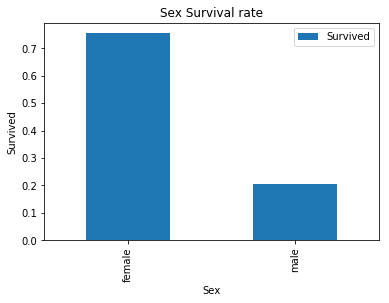

--------
饼状图


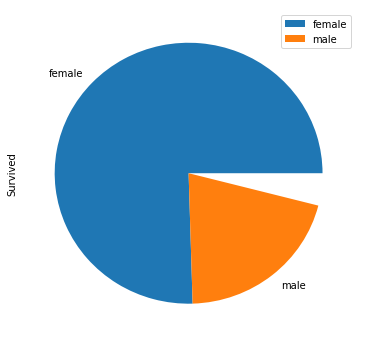

In [57]:
influence_survival_rate('Sex')

结果显示女性存活率较高

## 判断票类等级对存活率的影响

生还人数
        Survived
Pclass          
1            122
2             83
3             85
--------
总人数
        Survived
Pclass          
1            186
2            173
3            355
--------
生还率
        Survived
Pclass          
1       0.655914
2       0.479769
3       0.239437
--------
直方图


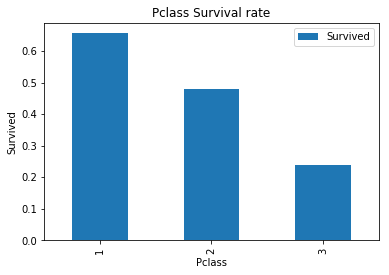

--------
饼状图


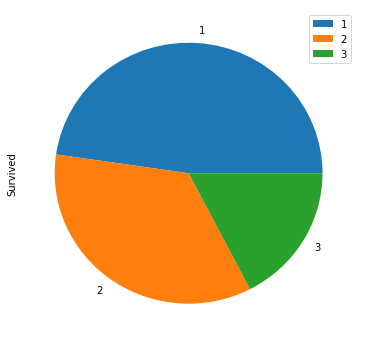

In [58]:
influence_survival_rate('Pclass')

结果显示票类等级高的存活率较高

# 结论

根据分析的结果显示票类等级和性别对存活率有较大的影响,由于数据不完整且有缺失,分析结果并不一定正确,这种结果只是代表一个较大概率的可能性. 